<a href="https://colab.research.google.com/github/Maayowa/NOAA-Storm-and-other-severe-weather-events-Data-Analysis/blob/master/Weather%20Events%20Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://d396qusza40orc.cloudfront.net/repdata%2Fdata%2FStormData.csv.bz2

--2020-07-30 09:02:49--  https://d396qusza40orc.cloudfront.net/repdata%2Fdata%2FStormData.csv.bz2
Resolving d396qusza40orc.cloudfront.net (d396qusza40orc.cloudfront.net)... 13.227.220.45, 13.227.220.55, 13.227.220.5, ...
Connecting to d396qusza40orc.cloudfront.net (d396qusza40orc.cloudfront.net)|13.227.220.45|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49177144 (47M) [application/bzip2]
Saving to: ‘repdata%2Fdata%2FStormData.csv.bz2’

repdata%2Fdata%2FSt 100%[===================>]  46.90M   150MB/s    in 0.3s    

2020-07-30 09:02:50 (150 MB/s) - ‘repdata%2Fdata%2FStormData.csv.bz2’ saved [49177144/49177144]



In [8]:
!bunzip2 /content/repdata%2Fdata%2FStormData.csv.bz2

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('tableau-colorblind10')

In [107]:
data = pd.read_csv(r'/content/repdata%2Fdata%2FStormData.csv', encoding='latin-1', parse_dates=True)
data.info()


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,9,10,11,12,16,17,27,28,29,30,35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902297 entries, 0 to 902296
Data columns (total 37 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   STATE__     902297 non-null  float64
 1   BGN_DATE    902297 non-null  object 
 2   BGN_TIME    902297 non-null  object 
 3   TIME_ZONE   902297 non-null  object 
 4   COUNTY      902297 non-null  float64
 5   COUNTYNAME  900708 non-null  object 
 6   STATE       902297 non-null  object 
 7   EVTYPE      902297 non-null  object 
 8   BGN_RANGE   902297 non-null  float64
 9   BGN_AZI     354965 non-null  object 
 10  BGN_LOCATI  614554 non-null  object 
 11  END_DATE    658886 non-null  object 
 12  END_TIME    663319 non-null  object 
 13  COUNTY_END  902297 non-null  float64
 14  COUNTYENDN  0 non-null       float64
 15  END_RANGE   902297 non-null  float64
 16  END_AZI     177460 non-null  object 
 17  END_LOCATI  403072 non-null  object 
 18  LENGTH      902297 non-null  float64
 19  WI

In [12]:
data.head(4)

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,COUNTYNAME,STATE,EVTYPE,BGN_RANGE,BGN_AZI,BGN_LOCATI,END_DATE,END_TIME,COUNTY_END,COUNTYENDN,END_RANGE,END_AZI,END_LOCATI,LENGTH,WIDTH,F,MAG,FATALITIES,INJURIES,PROPDMG,PROPDMGEXP,CROPDMG,CROPDMGEXP,WFO,STATEOFFIC,ZONENAMES,LATITUDE,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS,REFNUM
0,1.0,4/18/1950 0:00:00,130,CST,97.0,MOBILE,AL,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,14.0,100.0,3.0,0.0,0.0,15.0,25.0,K,0.0,NaN,NaN,NaN,NaN,3040.0,8812.0,3051.0,8806.0,NaN,1.0
1,1.0,4/18/1950 0:00:00,145,CST,3.0,BALDWIN,AL,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,2.0,150.0,2.0,0.0,0.0,0.0,2.5,K,0.0,NaN,NaN,NaN,NaN,3042.0,8755.0,0.0,0.0,NaN,2.0
2,1.0,2/20/1951 0:00:00,1600,CST,57.0,FAYETTE,AL,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.1,123.0,2.0,0.0,0.0,2.0,25.0,K,0.0,NaN,NaN,NaN,NaN,3340.0,8742.0,0.0,0.0,NaN,3.0
3,1.0,6/8/1951 0:00:00,900,CST,89.0,MADISON,AL,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,100.0,2.0,0.0,0.0,2.0,2.5,K,0.0,NaN,NaN,NaN,NaN,3458.0,8626.0,0.0,0.0,NaN,4.0


In [15]:
data.tail(3)

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,COUNTYNAME,STATE,EVTYPE,BGN_RANGE,BGN_AZI,BGN_LOCATI,END_DATE,END_TIME,COUNTY_END,COUNTYENDN,END_RANGE,END_AZI,END_LOCATI,LENGTH,WIDTH,F,MAG,FATALITIES,INJURIES,PROPDMG,PROPDMGEXP,CROPDMG,CROPDMGEXP,WFO,STATEOFFIC,ZONENAMES,LATITUDE,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS,REFNUM
902294,2.0,11/8/2011 0:00:00,02:58:00 PM,AKS,213.0,AKZ213,AK,HIGH WIND,0.0,NaN,NaN,11/9/2011 0:00:00,01:15:00 PM,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,81.0,0.0,0.0,0.0,K,0.0,K,AFG,"ALASKA, Northern",ST LAWRENCE IS. BERING STRAIT - ST LAWRENCE IS...,0.0,0.0,0.0,0.0,EPISODE NARRATIVE: A 960 mb low over the south...,902295.0
902295,2.0,11/9/2011 0:00:00,10:21:00 AM,AKS,202.0,AKZ202,AK,BLIZZARD,0.0,NaN,NaN,11/9/2011 0:00:00,05:00:00 PM,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,K,0.0,K,AFG,"ALASKA, Northern",NORTHERN ARCTIC COAST - NORTHERN ARCTIC COAST,0.0,0.0,0.0,0.0,EPISODE NARRATIVE: A 960 mb low over the south...,902296.0
902296,1.0,11/28/2011 0:00:00,08:00:00 PM,CST,6.0,ALZ006,AL,HEAVY SNOW,0.0,NaN,NaN,11/29/2011 0:00:00,04:00:00 AM,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,K,0.0,K,HUN,"ALABAMA, North",MADISON - MADISON,0.0,0.0,0.0,0.0,EPISODE NARRATIVE: An intense upper level low ...,902297.0


In [16]:
# Type of Weather events in the US since the 1950
data.EVTYPE.unique()

array(['TORNADO', 'TSTM WIND', 'HAIL', 'FREEZING RAIN', 'SNOW',
       'ICE STORM/FLASH FLOOD', 'SNOW/ICE', 'WINTER STORM',
       'HURRICANE OPAL/HIGH WINDS', 'THUNDERSTORM WINDS', 'RECORD COLD',
       'HURRICANE ERIN', 'HURRICANE OPAL', 'HEAVY RAIN', 'LIGHTNING',
       'THUNDERSTORM WIND', 'DENSE FOG', 'RIP CURRENT',
       'THUNDERSTORM WINS', 'FLASH FLOOD', 'FLASH FLOODING', 'HIGH WINDS',
       'FUNNEL CLOUD', 'TORNADO F0', 'THUNDERSTORM WINDS LIGHTNING',
       'THUNDERSTORM WINDS/HAIL', 'HEAT', 'WIND', 'LIGHTING',
       'HEAVY RAINS', 'LIGHTNING AND HEAVY RAIN', 'FUNNEL', 'WALL CLOUD',
       'FLOODING', 'THUNDERSTORM WINDS HAIL', 'FLOOD', 'COLD',
       'HEAVY RAIN/LIGHTNING', 'FLASH FLOODING/THUNDERSTORM WI',
       'WALL CLOUD/FUNNEL CLOUD', 'THUNDERSTORM', 'WATERSPOUT',
       'EXTREME COLD', 'HAIL 1.75)', 'LIGHTNING/HEAVY RAIN', 'HIGH WIND',
       'BLIZZARD', 'BLIZZARD WEATHER', 'WIND CHILL', 'BREAKUP FLOODING',
       'HIGH WIND/BLIZZARD', 'RIVER FLOOD', 'HEAVY SNOW', 

In [14]:
#Number of Uniques Values in each column
data.nunique()

STATE__           70
BGN_DATE       16335
BGN_TIME        4142
TIME_ZONE         22
COUNTY           557
COUNTYNAME     29600
STATE             72
EVTYPE           985
BGN_RANGE        272
BGN_AZI           34
BGN_LOCATI     54428
END_DATE        6662
END_TIME        3646
COUNTY_END         1
COUNTYENDN         0
END_RANGE        266
END_AZI           23
END_LOCATI     34505
LENGTH           568
WIDTH            293
F                  6
MAG              226
FATALITIES        52
INJURIES         200
PROPDMG         1390
PROPDMGEXP        18
CROPDMG          432
CROPDMGEXP         8
WFO              541
STATEOFFIC       249
ZONENAMES      25111
LATITUDE        1780
LONGITUDE       3841
LATITUDE_E      1728
LONGITUDE_      3778
REMARKS       436905
REFNUM        902297
dtype: int64


## Data Exploration and cleaning for the damages estimates



In [21]:
dmg_exp_null = data.loc[(data.PROPDMGEXP.isnull()) | (data.CROPDMGEXP.isnull())]
dmg_exp_null

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,COUNTYNAME,STATE,EVTYPE,BGN_RANGE,BGN_AZI,BGN_LOCATI,END_DATE,END_TIME,COUNTY_END,COUNTYENDN,END_RANGE,END_AZI,END_LOCATI,LENGTH,WIDTH,F,MAG,FATALITIES,INJURIES,PROPDMG,PROPDMGEXP,CROPDMG,CROPDMGEXP,WFO,STATEOFFIC,ZONENAMES,LATITUDE,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS,REFNUM
0,1.0,4/18/1950 0:00:00,130,CST,97.0,MOBILE,AL,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,14.0,100.0,3.0,0.0,0.0,15.0,25.0,K,0.0,NaN,NaN,NaN,NaN,3040.0,8812.0,3051.0,8806.0,NaN,1.0
1,1.0,4/18/1950 0:00:00,145,CST,3.0,BALDWIN,AL,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,2.0,150.0,2.0,0.0,0.0,0.0,2.5,K,0.0,NaN,NaN,NaN,NaN,3042.0,8755.0,0.0,0.0,NaN,2.0
2,1.0,2/20/1951 0:00:00,1600,CST,57.0,FAYETTE,AL,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.1,123.0,2.0,0.0,0.0,2.0,25.0,K,0.0,NaN,NaN,NaN,NaN,3340.0,8742.0,0.0,0.0,NaN,3.0
3,1.0,6/8/1951 0:00:00,900,CST,89.0,MADISON,AL,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,100.0,2.0,0.0,0.0,2.0,2.5,K,0.0,NaN,NaN,NaN,NaN,3458.0,8626.0,0.0,0.0,NaN,4.0
4,1.0,11/15/1951 0:00:00,1500,CST,43.0,CULLMAN,AL,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,150.0,2.0,0.0,0.0,2.0,2.5,K,0.0,NaN,NaN,NaN,NaN,3412.0,8642.0,0.0,0.0,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647197,95.0,7/30/2006 0:00:00,04:45:00 PM,EST,165.0,LE VERMILION TO AVON PT OH BYD 5NM OFFSHORE TO...,LE,MARINE TSTM WIND,0.0,NaN,VERMILION,7/30/2006 0:00:00,05:15:00 PM,0.0,NaN,0.0,NaN,AVON POINT,0.0,0.0,NaN,35.0,0.0,0.0,0.0,NaN,0.0,NaN,CLE,LAKE ERIE,NaN,0.0,0.0,0.0,0.0,Strong thunderstorms moved across the southern...,647147.0
647198,95.0,7/30/2006 0:00:00,04:45:00 PM,EST,166.0,LE AVON PT TO WILLOWICK OH BYD 5NM OFFSHORE TO...,LE,MARINE TSTM WIND,0.0,NaN,AVON POINT,7/30/2006 0:00:00,05:15:00 PM,0.0,NaN,0.0,NaN,WILLOWICK,0.0,0.0,NaN,35.0,0.0,0.0,0.0,NaN,0.0,NaN,CLE,LAKE ERIE,NaN,0.0,0.0,0.0,0.0,Strong thunderstorms moved across the southern...,647148.0
647199,95.0,7/30/2006 0:00:00,04:45:00 PM,EST,167.0,LE WILLOWICK TO GENEVA ON THE LAKE OH BYD 5NM ...,LE,MARINE TSTM WIND,0.0,NaN,WILLOWICK,7/30/2006 0:00:00,05:15:00 PM,0.0,NaN,0.0,NaN,GENEVA-ON-THE-LAKE,0.0,0.0,NaN,35.0,0.0,0.0,0.0,NaN,0.0,NaN,CLE,LAKE ERIE,NaN,0.0,0.0,0.0,0.0,Strong thunderstorms moved across the southern...,647149.0
647200,95.0,8/30/2006 0:00:00,06:57:00 PM,EST,142.0,MAUMEE BAY TO RENO BEACH OH,LE,WATERSPOUT,0.0,NaN,MAUMEE BAY,8/30/2006 0:00:00,07:15:00 PM,0.0,NaN,0.0,NaN,RENO BEACH,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,CLE,LAKE ERIE,NaN,0.0,0.0,0.0,0.0,Waterspouts were observed over Lake Erie durin...,647150.0


In [22]:
print('Unique cash labels for: \nProperty damage: {}'.format(data.PROPDMGEXP.unique()))
print('\nCrop Damage: {}'.format(data.CROPDMGEXP.unique()))

Unique cash labels for: 
Property damage: ['K' 'M' nan 'B' 'm' '+' '0' '5' '6' '?' '4' '2' '3' 'h' '7' 'H' '-' '1'
 '8']

Crop Damage: [nan 'M' 'K' 'm' 'B' '?' '0' 'k' '2']


In [104]:
lists = ['nan', '+', '?', '-']
list2 = ['1','2','3','4','5','6','7', '8']
dmg_exp_lists = data.loc[(data.PROPDMGEXP.isin(lists))]
dmg_exp_list2 = data.loc[(data.PROPDMGEXP.isin(list2))]
# dmg_exp_list1 = data.loc[(data.PROPDMGEXP.isnull()) | (data.CROPDMGEXP.isnull())]

In [44]:
dmg_exp_list2.sample(5)

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,COUNTYNAME,STATE,EVTYPE,BGN_RANGE,BGN_AZI,BGN_LOCATI,END_DATE,END_TIME,COUNTY_END,COUNTYENDN,END_RANGE,END_AZI,END_LOCATI,LENGTH,WIDTH,F,MAG,FATALITIES,INJURIES,PROPDMG,PROPDMGEXP,CROPDMG,CROPDMGEXP,WFO,STATEOFFIC,ZONENAMES,LATITUDE,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS,REFNUM
234018,47.0,5/18/1995 0:00:00,1345,CST,39.0,DECATUR,TN,HAIL,0.0,NaN,Decaturville,NaN,1350CST,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,275.0,0.0,0.0,0.0,1,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Several cars had their windshield broken by ha...,234006.0
220985,37.0,7/4/1995 0:00:00,1930,EST,131.0,NORTHAMPTON,NC,FLASH FLOOD,0.0,NaN,Severn,7/4/1995 0:00:00,2145EST,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,68.0,7,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Up to eight inches of rain in a three hour per...,220960.0
234182,47.0,5/18/1995 0:00:00,2015,CST,63.0,HAMBLEN,TN,HAIL,0.0,NaN,Morristown,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,275.0,0.0,0.0,0.0,5,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Several cars were damaged and windows were bro...,234170.0
234253,47.0,5/18/1995 0:00:00,2100,CST,105.0,LOUDON,TN,TORNADO,0.0,NaN,Fort Loodon Lake,NaN,NaN,0.0,NaN,0.0,NaN,NaN,1.0,20.0,0.0,0.0,0.0,0.0,0.0,1,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,A houseboat was torn loose from a boat dock. ...,234464.0
235037,47.0,5/18/1995 0:00:00,1200,CST,169.0,TROUSDALE,TN,THUNDERSTORM WINDS,0.0,NaN,Hartsville,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,A Tennessee Valley Authority transmission towe...,234968.0


In [113]:
data['Health_damages'] = data['FATALITIES'] + data['INJURIES']

## Data Transformation (Population Health)

In [51]:
data.columns

Index(['STATE__', 'BGN_DATE', 'BGN_TIME', 'TIME_ZONE', 'COUNTY', 'COUNTYNAME',
       'STATE', 'EVTYPE', 'BGN_RANGE', 'BGN_AZI', 'BGN_LOCATI', 'END_DATE',
       'END_TIME', 'COUNTY_END', 'COUNTYENDN', 'END_RANGE', 'END_AZI',
       'END_LOCATI', 'LENGTH', 'WIDTH', 'F', 'MAG', 'FATALITIES', 'INJURIES',
       'PROPDMG', 'PROPDMGEXP', 'CROPDMG', 'CROPDMGEXP', 'WFO', 'STATEOFFIC',
       'ZONENAMES', 'LATITUDE', 'LONGITUDE', 'LATITUDE_E', 'LONGITUDE_',
       'REMARKS', 'REFNUM', 'Health_damages'],
      dtype='object')

#### Top Weather Events by Health Implications


In [114]:
data_new = data.sort_values(by = 'Health_damages', ascending=False)
data_new.head(2)

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,COUNTYNAME,STATE,EVTYPE,BGN_RANGE,BGN_AZI,BGN_LOCATI,END_DATE,END_TIME,COUNTY_END,COUNTYENDN,END_RANGE,END_AZI,END_LOCATI,LENGTH,WIDTH,F,MAG,FATALITIES,INJURIES,PROPDMG,PROPDMGEXP,CROPDMG,CROPDMGEXP,WFO,STATEOFFIC,ZONENAMES,LATITUDE,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS,REFNUM,Health_damages
157884,48.0,4/10/1979 0:00:00,1755,CST,485.0,WICHITA,TX,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,12.9,1760.0,4.0,0.0,42.0,1700.0,250.0,1000000,0.0,1,NaN,NaN,NaN,3350.0,9838.0,3355.0,9826.0,NaN,157885.0,1742.0
223448,39.0,2/8/1994 0:00:00,500,EST,0.0,OHZ42>088,OH,ICE STORM,0.0,NaN,Southern and Central,2/9/1994 0:00:00,0100EST,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.0,1568.0,50.0,1000000,5.0,1000000,NaN,NaN,DARKE - DARKE,0.0,0.0,0.0,0.0,The worst ice storm in recent memory struck so...,223436.0,1569.0


In [149]:
top_health_events = data.pivot_table(values = ['Health_damages'], index = ['EVTYPE'], aggfunc=  'sum').sort_values(by = 'Health_damages', ascending = False)[:15]
top_health_events

,Health_damages
EVTYPE,
TORNADO,96979.0
EXCESSIVE HEAT,8428.0
TSTM WIND,7461.0
FLOOD,7259.0
LIGHTNING,6046.0
HEAT,3037.0
FLASH FLOOD,2755.0
ICE STORM,2064.0
THUNDERSTORM WIND,1621.0


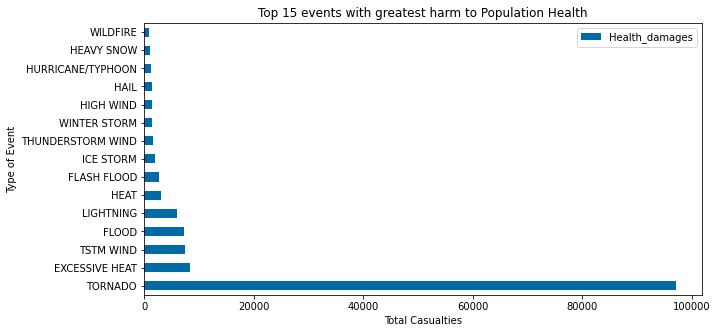

In [155]:
plt.rcParams['figure.figsize'] = (10,5)
top_health_events.plot.barh()
plt.title('Top 15 events with greatest harm to Population Health')
plt.xlabel('Total Casualties')
plt.ylabel('Type of Event');


##### Events implication on health

As shown in the plot and the pivot table above, Tornadoes caused the most damages in health in terms of deaths and injuries with a nearly 97,000 casualties followed by Excessive heat with over 8000 casualties and then Thunderstorm winds and Floods with over 7000 injuries and fatalities




## Data Transformation (Economic Consequences)


In [111]:
def mag_conversion(i):
  # lists = ['nan', '+', '?', '-']
  list2 = ['k','K', '3'] 
  list3 = ['m','M', '6']
  list4 = ['h','H','2']
  list5 = ['1','4','5','7', '8']
  if i in list2:
    return 10 ** 3
  elif i in list3:
    return 10 ** 6
  elif i in list4:
    return 10 ** 2
  elif i in list5:
    return 10 ** int(i)
  elif i == 'B':
    return 10 ** 9
  else:
    return 1



data.CROPDMGEXP = data.CROPDMGEXP.apply(mag_conversion)
data.PROPDMGEXP = data.PROPDMGEXP.apply(mag_conversion)

In [132]:
data.sample(4)

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,COUNTYNAME,STATE,EVTYPE,BGN_RANGE,BGN_AZI,BGN_LOCATI,END_DATE,END_TIME,COUNTY_END,COUNTYENDN,END_RANGE,END_AZI,END_LOCATI,LENGTH,WIDTH,F,MAG,FATALITIES,INJURIES,PROPDMG,PROPDMGEXP,CROPDMG,CROPDMGEXP,WFO,STATEOFFIC,ZONENAMES,LATITUDE,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS,REFNUM,Health_damages
374064,48.0,3/12/1999 0:00:00,09:40:00 PM,CST,457.0,TYLER,TX,HAIL,0.0,NaN,CHESTER,3/12/1999 0:00:00,09:40:00 PM,0.0,NaN,0.0,NaN,CHESTER,0.0,0.0,NaN,100.0,0.0,0.0,0.0,1,0.0,1,LCH,"TEXAS, Southeast",NaN,3055.0,9436.0,3055.0,9436.0,NaN,373990.0,0.0
450954,6.0,11/7/2002 0:00:00,03:52:00 AM,PST,85.0,CAZ085,CA,HIGH WIND,0.0,NaN,NaN,11/7/2002 0:00:00,03:52:00 AM,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,66.0,0.0,0.0,0.0,1,0.0,1,MFR,"CALIFORNIA, Upper",MODOC COUNTY - MODOC COUNTY,0.0,0.0,0.0,0.0,A weather station at Adin recorded this gust.\...,450945.0,0.0
731903,42.0,3/5/2008 0:00:00,02:58:00 AM,EST,101.0,PHILADELPHIA,PA,THUNDERSTORM WIND,1.0,NE,CRESCENTVILLE,3/5/2008 0:00:00,02:58:00 AM,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,50.0,0.0,0.0,0.0,1000,0.0,1000,PHI,"PENNSYLVANIA, East",...,4002.0,7505.0,0.0,0.0,EVENT NARRATIVE: A severe thunderstorm knocked...,731863.0,0.0
70930,26.0,7/17/1983 0:00:00,1010,CST,65.0,INGHAM,MI,TSTM WIND,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1,0.0,1,AT,NaN,NaN,4234.0,8425.0,0.0,0.0,NaN,70931.0,0.0


In [137]:
data['Economic_Loss'] = data.PROPDMG * data.PROPDMGEXP + data.CROPDMGEXP * data.CROPDMG
data.head(3)


,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,COUNTYNAME,STATE,EVTYPE,BGN_RANGE,BGN_AZI,BGN_LOCATI,END_DATE,END_TIME,COUNTY_END,COUNTYENDN,END_RANGE,END_AZI,END_LOCATI,LENGTH,WIDTH,F,MAG,FATALITIES,INJURIES,PROPDMG,PROPDMGEXP,CROPDMG,CROPDMGEXP,WFO,STATEOFFIC,ZONENAMES,LATITUDE,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS,REFNUM,Health_damages,Economic_Loss
0,1.0,4/18/1950 0:00:00,130,CST,97.0,MOBILE,AL,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,14.0,100.0,3.0,0.0,0.0,15.0,25.0,1000,0.0,1,NaN,NaN,NaN,3040.0,8812.0,3051.0,8806.0,NaN,1.0,15.0,25000.0
1,1.0,4/18/1950 0:00:00,145,CST,3.0,BALDWIN,AL,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,2.0,150.0,2.0,0.0,0.0,0.0,2.5,1000,0.0,1,NaN,NaN,NaN,3042.0,8755.0,0.0,0.0,NaN,2.0,0.0,2500.0
2,1.0,2/20/1951 0:00:00,1600,CST,57.0,FAYETTE,AL,TORNADO,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.1,123.0,2.0,0.0,0.0,2.0,25.0,1000,0.0,1,NaN,NaN,NaN,3340.0,8742.0,0.0,0.0,NaN,3.0,2.0,25000.0


#### Type of events across the USA with greatest economic consequences
The table below lists the top 15 weather events with the most economic consequence in the US

In [142]:
disaster_by_economic_loss = data.pivot_table(values = ['Economic_Loss'], index = ['EVTYPE'], aggfunc=  'sum').sort_values(by = 'Economic_Loss', ascending = False)[:15]
disaster_by_economic_loss

,Economic_Loss
EVTYPE,
FLOOD,1.503197e+11
HURRICANE/TYPHOON,7.191371e+10
TORNADO,5.736233e+10
STORM SURGE,4.332354e+10
HAIL,1.876122e+10
FLASH FLOOD,1.824399e+10
DROUGHT,1.501867e+10
HURRICANE,1.461023e+10
RIVER FLOOD,1.014840e+10


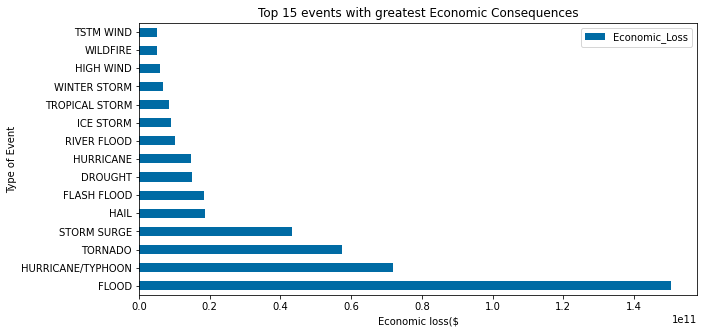

In [153]:
disaster_by_economic_loss.plot(kind = 'barh')
plt.title('Top 15 events with greatest Economic Consequences')
plt.xlabel('Economic loss($)')
plt.ylabel('Type of Event');

#### Economic consequences of events
As Indicated above, Flood events have the most net economic effect in the US with over $150 billion of food or property loss. Hurricane and Tornadoes follows with over 70 and 50 billion dollars worth of loss respectively